# Stock Price Comparative Analysis and Forecasting
***

**A stock is the small chunk of ownership in the company.** The stock price of the company reflects the net evaluation of the company and also gives a little insight into its performance. These stocks are traded on exchanges and their prices are constantly changing due to their demand and supply in the market. 

If a stock is in high demand and low in supply i.e. more people want to buy it and fewer people are willing to sell it then the price for the stock will go up and similarly if the stock is in low demand and high on supply which means more people are ready to sell it but fewer people are willing to buy it then its prices go down.

The sudden increase in the demand for the stock can be due to various reasons including positive news about the company or an announcement from the company. After a period of time when the demand for the stock vanishes its prices slowly creep down as the investor loses interest in it. These stock prices going up and down is an iterative process and repeated. This volatility of stock makes investors nervous while investing in a company. So to understand the risk associated with it there must be a proper analysis of stock before buying it.

In trading stocks. Investor is interested in making profitable stock trades with minimal risk. So when an investor buy a stock, he want to be fairly certain that the price will increase. He will buy stock when the market opens, and sell it when the market closes. 

**Objectives**:
* to compare the stock options in a certain stock market sector in order to decide the best stock to buy
* to forecast stock price in order to decide the best period of investment
* to learn time series analysis and forecasting

**Key Steps**:
1. Data Collection
2. Data Understanding
3. Exploratory Data Analysis, include data visualization to get better understanding of the dataset. Finding stock price behaviour over the years, seasonality, and check the stationarity.
4. Data Preprocessing, include splitting dataset into training-testing, and normalization.
5. Modelling, try to explore any possible algorithms, such as standard average, exponential smoothing moving average, ARIMA, and probably LSTM. 
6. Model Evaluation
7. Conclusion and Recommendation

### Import Libraries

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Data Collection

The dataset will be used in this project is the stock price of three companies in basic industry sector which has been categorised as blue chip:
1. TPIA (PT Chandra Asri Petrochemical Tbk)
2. ANTM (PT Aneka Tambang Tbk)
3. INTP (PT Indocement Tunggal Prakarsa Tbk)

Downloaded from https://www.kaggle.com/datasets/muamkh/ihsgstockdata

A blue chip stock is a huge company with an excellent reputation. These are typically large, well-established, and financially sound companies that have operated for many years and that have dependable earnings, often paying dividends to investors. A blue chip stock typically has a market capitalization in the billions (>10 billions), is generally the market leader or among the top three companies in its sector, and is more often than not a household name. For all of these reasons, blue chip stocks are among the most popular to buy among investors. (https://www.investopedia.com/terms/b/bluechipstock.asp#:~:text=Jessica%20Olah-,What%20Is%20a%20Blue%20Chip%20Stock%3F,often%20paying%20dividends%20to%20investors.)

The dataset consists of 6 columns:
* `timestamp` : The date
* `open` : The price of the stock when the market opens in the morning
* `close` : The price of the stock when the market closed in the evening
* `high` : Highest price the stock reached during that day
* `low` : Lowest price the stock is traded on that day
* `volume` : The total amount of stocks traded on that day

In [2]:
chandra = pd.read_csv('TPIA.csv')
antam = pd.read_csv('ANTM.csv')
indocement = pd.read_csv('INTP.csv')

**PT. Chandra Asri Petrochemical Tbk (TPIA)** is the suppliers of petrochemical product to various Indonesian manufacturing industries. The company produce products and resins including Monomers, Polyethylene, and Polypropylene. The Company belongs to a group of companies owned by Barito Pacific.

RECORDING DATE: 1905-06-10 / **2008-05-26**

In [ ]:
chandra.head()

,timestamp,open,low,high,close,volume
0,2008-05-26,1200,1200,1200,1200,2270500
1,2008-05-27,647,647,696,667,24998898
2,2008-05-28,687,569,687,672,6201336
3,2008-05-29,657,652,682,682,3298041
4,2008-05-30,677,677,687,682,3185984


In [ ]:
chandra.tail()

,timestamp,open,low,high,close,volume
3715,2022-08-22,2262,2243,2268,2256,13235200
3716,2022-08-23,2260,2260,2410,2410,13266200
3717,2022-08-24,2420,2360,2420,2380,11287200
3718,2022-08-25,2380,2330,2400,2330,11812700
3719,2022-08-26,2340,2310,2350,2350,9886400


**PT. Aneka Tambang Tbk (ANTM)** is engaged in the mining of natural deposits also manufacturing, trading, transportation and other related services. The Company commenced its commercial operations on July 5, 1968.

RECORDING DATE: 1968-07-05 / **1997-11-27**

In [ ]:
antam.head()

,timestamp,open,low,high,close,volume
0,2001-04-16,432,407,436,432,0
1,2001-04-17,432,407,436,432,0
2,2001-04-18,432,407,436,432,0
3,2001-04-19,432,407,436,432,0
4,2001-04-20,432,407,436,432,0


In [ ]:
antam.tail()

,timestamp,open,low,high,close,volume
5570,2022-08-22,2060,1980,2070,1985,140299600
5571,2022-08-23,1985,1965,2050,2030,87682800
5572,2022-08-24,2020,2000,2040,2010,54617900
5573,2022-08-25,2010,1985,2040,1995,90209100
5574,2022-08-26,1995,1955,2000,1955,135647800


**PT. Indocement Tunggal Prakarsa Tbk (INTP)** is producers of cement with cement products marketed under the brand name "Tiga Roda". The Company started its commercial operations in 1985. Currently, the Company and Subsidiaries is involved in several businesses consisting of the manufacture and sale of cement (as core business) and ready-mix concrete, and aggregates and trass quarrying.

RECORDING DATE: 1985-01-16 / **1989-12-05**

In [ ]:
indocement.head()

,timestamp,open,low,high,close,volume
0,2001-04-16,1100,1100,1100,1100,140000
1,2001-04-17,1100,1075,1100,1100,87500
2,2001-04-18,1100,1100,1125,1100,334000
3,2001-04-19,1100,975,1100,1025,1522000
4,2001-04-20,975,975,975,975,332500


In [ ]:
indocement.tail()

,timestamp,open,low,high,close,volume
5570,2022-08-22,9200,9150,9300,9225,4176200
5571,2022-08-23,9275,9225,9450,9275,4323200
5572,2022-08-24,9275,9275,9525,9500,5760100
5573,2022-08-25,9500,9300,9525,9350,3582900
5574,2022-08-26,9350,9300,9375,9300,2149200


## 2. Data Cleaning

### General Information, Missing Values, and Duplicated Values

In [3]:
#get the shape of dataset
print('Total records for TPIA stock (rows)', chandra.shape[0])
print('Total records for ANTM stock (rows)', antam.shape[0])
print('Total records for INTP stock (rows)', indocement.shape[0])

Total records for TPIA stock (rows) 3720
Total records for ANTM stock (rows) 5575
Total records for INTP stock (rows) 5575


`ANTM` and `TPIA` have 5575 days recorded, while `TPIA` has only 3720 days due to the latter has the most recent stock recording date. `TPIA` only started from May 26th, 2008.

In [4]:
#get general infomation on data types and missing values
print('===TPIA dataset===')
print(chandra.info(), '\n')
print('===ANTM dataset===')
print(antam.info(), '\n')
print('===INTP dataset===')
print(indocement.info())

===TPIA dataset===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  3720 non-null   object
 1   open       3720 non-null   int64 
 2   low        3720 non-null   int64 
 3   high       3720 non-null   int64 
 4   close      3720 non-null   int64 
 5   volume     3720 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 174.5+ KB
None 

===ANTM dataset===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  5575 non-null   object
 1   open       5575 non-null   int64 
 2   low        5575 non-null   int64 
 3   high       5575 non-null   int64 
 4   close      5575 non-null   int64 
 5   volume     5575 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 261.5+ KB
None 

===INTP 

There are no missing values in each column, which is very good! But `timestamp` column apparently does not come with the proper data type, so we have to convert it into datetime.

In [3]:
#convert timestamp column into datetime
chandra['timestamp'] = pd.to_datetime(chandra['timestamp'], format="%Y/%m/%d").dt.date
antam['timestamp'] = pd.to_datetime(antam['timestamp'], format="%Y/%m/%d").dt.date
indocement['timestamp'] = pd.to_datetime(indocement['timestamp'], format="%Y/%m/%d").dt.date

#make sure the dataset is sorted by date
chandra = chandra.sort_values('timestamp')
antam = antam.sort_values('timestamp')
indocement = indocement.sort_values('timestamp')

#rename column
chandra.rename(columns={'timestamp':'date'}, inplace=True)
antam.rename(columns={'timestamp':'date'}, inplace=True)
indocement.rename(columns={'timestamp':'date'}, inplace=True)

In [6]:
#check missing values
print('missing values in TPIA dataset:', chandra.isna().any(axis=1).sum(), 'rows')
print('missing values in ANTM dataset:', antam.isna().any(axis=1).sum(), 'rows')
print('missing values in INTP dataset:', indocement.isna().any(axis=1).sum(), 'rows')

missing values in TPIA dataset: 0 rows
missing values in ANTM dataset: 0 rows
missing values in INTP dataset: 0 rows


In [7]:
#check duplicated values
print('duplicated values in TPIA dataset:', chandra.duplicated().sum(), 'rows')
print('duplicated values in ANTM dataset:', antam.duplicated().sum(), 'rows')
print('duplicated values in INTP dataset:', indocement.duplicated().sum(), 'rows')

duplicated values in TPIA dataset: 0 rows
duplicated values in ANTM dataset: 0 rows
duplicated values in INTP dataset: 0 rows


The dataset has already been cleaned!

## 3. Exploratory Data Analysis

### 3.1. Statistical Measures of Central Tendency

In [5]:
chandra.describe()

,open,low,high,close,volume
count,3720.000000,3720.000000,3720.000000,3720.000000,3.720000e+03
mean,3219.748387,3174.984677,3257.472312,3220.250538,2.451085e+06
std,3400.694115,3351.033294,3440.629476,3398.740027,4.011823e+06
min,294.000000,294.000000,294.000000,294.000000,0.000000e+00
25%,520.000000,514.000000,530.000000,520.000000,6.112000e+03
50%,711.000000,698.000000,716.000000,711.000000,4.036595e+05
75%,5731.250000,5650.000000,5800.000000,5731.250000,3.300450e+06
max,11275.000000,11200.000000,11350.000000,11275.000000,3.822010e+07


In [4]:
antam.describe()

,open,low,high,close,volume
count,5575.000000,5575.000000,5575.000000,5575.000000,5.575000e+03
mean,1133.281973,1108.639103,1153.530224,1132.138655,5.814790e+07
std,736.910307,724.137870,752.502568,736.034945,1.250818e+08
min,290.000000,285.000000,294.000000,287.000000,0.000000e+00
25%,474.000000,466.000000,482.000000,474.000000,0.000000e+00
50%,886.000000,873.000000,905.000000,885.000000,2.177024e+07
75%,1612.000000,1587.000000,1629.000000,1612.000000,6.501365e+07
max,4409.000000,4115.000000,4451.000000,4241.000000,2.186653e+09


In [6]:
indocement.describe()

,open,low,high,close,volume
count,5575.000000,5575.000000,5575.000000,5575.000000,5.575000e+03
mean,11956.031390,11769.304933,12124.183857,11955.412556,2.631048e+06
std,7681.045362,7574.541089,7777.305668,7681.120316,3.310543e+06
min,600.000000,575.000000,600.000000,575.000000,0.000000e+00
25%,4300.000000,4250.000000,4375.000000,4300.000000,9.034500e+05
50%,12625.000000,12350.000000,12950.000000,12600.000000,1.914500e+06
75%,18700.000000,18450.000000,19000.000000,18700.000000,3.405750e+06
max,26800.000000,26350.000000,27500.000000,26950.000000,1.271081e+08


### 3.1. Overall Stock Price Fluctuation 

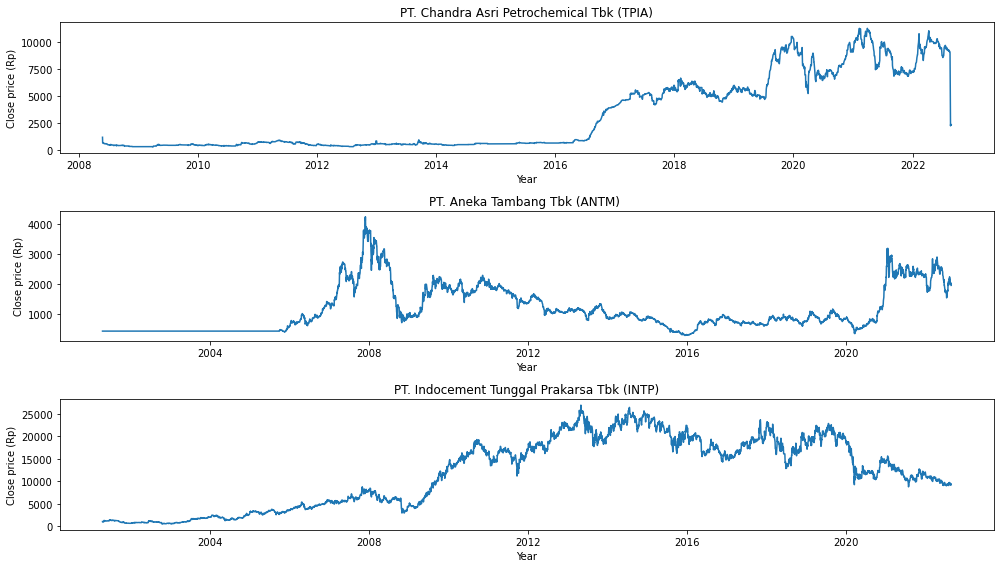

In [7]:
plt.figure(figsize=(14, 8))

#plot overall TPIA stock price movement
plt.subplot(3, 1, 1)
plt.plot(chandra['date'], chandra['close'])
plt.title('PT. Chandra Asri Petrochemical Tbk (TPIA)')
plt.xlabel('Year')
plt.ylabel('Close price (Rp)')
plt.tight_layout()
plt.savefig('tpia_overallprice.png')

#plot overall ANTM stock price movement
plt.subplot(3, 1, 2)
plt.plot(antam['date'], antam['close'])
plt.title('PT. Aneka Tambang Tbk (ANTM) ')
plt.xlabel('Year')
plt.ylabel('Close price (Rp)')
plt.tight_layout()
plt.savefig('antm_overallprice.png')

#plot overall INTP stock price movement
plt.subplot(3, 1, 3)
plt.plot(indocement['date'], indocement['close'])
plt.title('PT. Indocement Tunggal Prakarsa Tbk (INTP)')
plt.xlabel('Year')
plt.ylabel('Close price (Rp)')
plt.tight_layout()
plt.savefig('intp_overallprice.png')

The line plots above show how the three stock prices fluctuate over time.

* **TPIA** shows steady line until 2016, then rise significantly during last 5 years. Reached its peak over 10.ooo rupiahs per share in 2021 and 2022 but somehow suffers a huge drop recently, almost reaching 2500 rupiahs per share.

* **ANTM** experienced high and low during the years. Reached its highest point with more than 4.000 rupiahs per share, then declined gradually until reaching its lowest valley, with less than 1000 rupiahs per share. This was followed by dramatic rise in 2021.

* **INTP** moves gradually with no significant drop or climb. Its price increases until 2012, then experience small fluctuation around 20.000 rupiahs per share. After 2016, it declines slightly until now.

Overall, TPIA and ANTM currently show an uptrend despite any fluctuations coming through the time, while INTP suffers a slight downtrend. It is important for investors to decide which stock will rise their price in the future, not the one which will drop their price. 

As the graph shows different time scales due to different recording date, we will subset the dataset and only utilize the most latest 5 years of the stock price movement.

In [4]:
#subset the latest 5 years of dataset

chandradf = chandra.copy()
chandradf['year'] = pd.DatetimeIndex(chandradf['date']).year
chandradf['month'] = pd.DatetimeIndex(chandradf['date']).month
chandradf = chandradf[chandradf['year']>=2017]

antamdf = antam.copy()
antamdf['year'] = pd.DatetimeIndex(antamdf['date']).year
antamdf['month'] = pd.DatetimeIndex(antamdf['date']).month
antamdf = antamdf[antamdf['year']>=2017]

indocementdf = indocement.copy()
indocementdf['year'] = pd.DatetimeIndex(indocementdf['date']).year
indocementdf['month'] = pd.DatetimeIndex(indocementdf['date']).month
indocementdf = indocementdf[indocementdf['year']>=2017]

### 3.2. Comparative Analysis of The Stock Prices in The Latest 5 Years

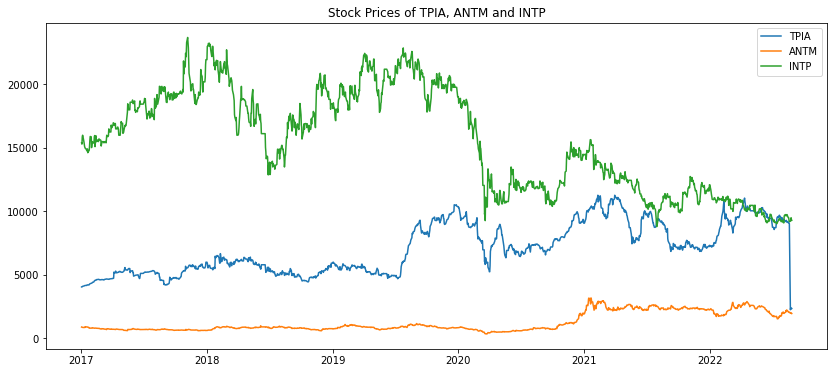

In [10]:
#plot the stock price for the latest 5 years
plt.figure(figsize=(14, 6))
plt.plot(chandradf['date'], chandradf['close'], label='TPIA')
plt.plot(antamdf['date'], antamdf['close'], label='ANTM')
plt.plot(indocementdf['date'], indocementdf['close'], label='INTP')
plt.title('Stock Prices of TPIA, ANTM and INTP')
plt.legend()
plt.savefig('stockpricecomparative.png')
plt.show()

The above graph is the representation of open stock prices for these three companies. The Graph clearly shows that the prices of `Indocement (INTP)` is much higher when comparing it to other two companies but we are not interested in the absolute prices for these companies but wanted to understand how these stock fluctuate with time.

This graph confirms our previous observation that only INTP that shows a slight declination, in opposite of TPIA and ANTM. Here, we see that currently the stock price of
* INTP: 9300 per share
* TPIA: 2350 per share
* ANTM: 1950 per share

As we buy share per lot (1 lot = 100 shares). Means to buy 1 lot of
* INTP: 930,000 rupiahs
* TPIA: 235,000 rupiahs
* ANTM: 195,000 rupiahs

We clearly see that ANTM has lower price. But again, to gain benefit of stock trading we do not need the absolute prices but its fluctuations with time.

### 3.3. Comparative Analysis of The Volume Traded of Each Stock

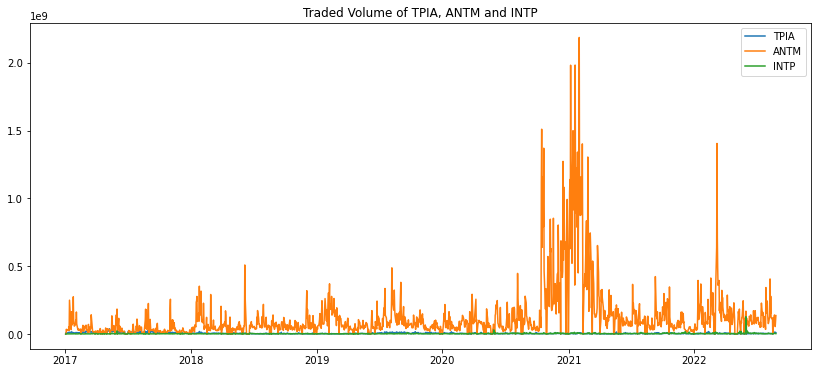

In [11]:
#plot the traded volume of these stocks for the latest 5 years
plt.figure(figsize=(14, 6))
plt.plot(chandradf['date'], chandradf['volume'], label='TPIA')
plt.plot(antamdf['date'], antamdf['volume'], label='ANTM')
plt.plot(indocementdf['date'], indocementdf['volume'], label='INTP')
plt.title('Traded Volume of TPIA, ANTM and INTP')
plt.legend()
plt.savefig('stockvolumecomparative.png')
plt.show()

The graph clearly shows that ANTM is superior in volume traded almost every single day than INTP and TPIA. The amount of volume traded sould also show the liquidity of a stock. Which means ANTM is much more liquid than others. Much popular than others. ANTM reached its peak in 2021, raising 2 billion shares traded a day.

For investor, the liquidity guarantees that the stock will always be available in a good amount for trading. There will be a good amount of people who are willing to buy and sell the stocks.

Liquidity wise, ANTM is much preferable than others. We will look more for TPIA and INTP in the next graph.



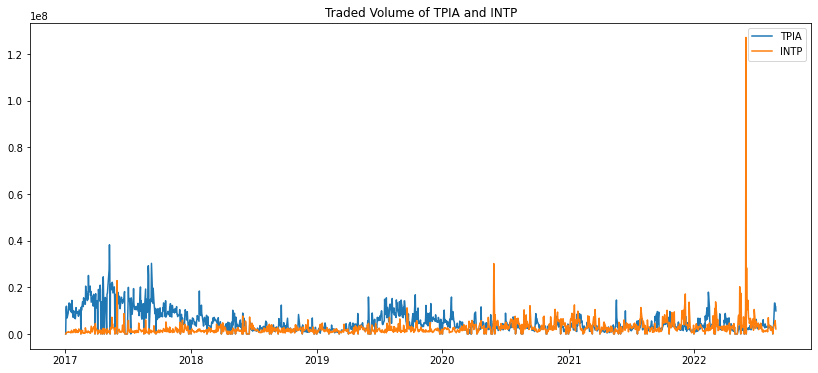

In [12]:
#plot the traded volume of TPIA and INTP for the latest 5 years
plt.figure(figsize=(14, 6))
plt.plot(chandradf['date'], chandradf['volume'], label='TPIA')
plt.plot(indocementdf['date'], indocementdf['volume'], label='INTP')
plt.title('Traded Volume of TPIA and INTP')
plt.legend()
plt.savefig('tpiaintpstockvolumecompare.png')
plt.show()

Now, let's see the INTP and TPIA stocks! The stock volume traded among them are below 20 million shares. 

Around 2017 - 2020, it was seen that TPIA is more liquid. But then in the last 2020 until now, INTP had slight favour in terms of liquidity. There is a high jump in volume traded in 2022. Something might lead this soaring figure, we have to check the financial news around INTP stock in 2022 to comprehend the cause of this.

What we could say is that among TPIA and INTP have fair share of volume traded since there is no significant difference between them overall.

### 3.4. Comparative Analysis of The Market Capitalization of Each Stock

Accoriding to Investopedia, market capitalization refers to the total dollar market value of a company's outstanding shares of stock. The investment community uses this figure to determine a company's size instead of sales or total asset figures. In an acquisition, the market cap is used to determine whether a takeover candidate represents a good value or not to the acquirer.

* Market capitalization refers to how much a company is worth as determined by the stock market. It is defined as the total market value of all outstanding shares.

* **To calculate a company's market cap, multiply the number of outstanding shares by the current market value of one share.**

* Companies are typically divided according to market capitalization: large-cap (Rp 10 billion or more), mid-cap (Rp 1 billion to Rp 10 billion), and small-cap (under Rp 1 billion).

* Market cap is often used to determine a company's size, then evaluate the company's financial performance to other companies of various sizes.

* In investing, companies with larger market capitalization are often safer investments as they represent more established companies with generally longer history in business.

https://www.investopedia.com/terms/m/marketcapitalization.asp 

https://www.finansialku.com/definisi-kapitalisasi-pasar-adalah/ 

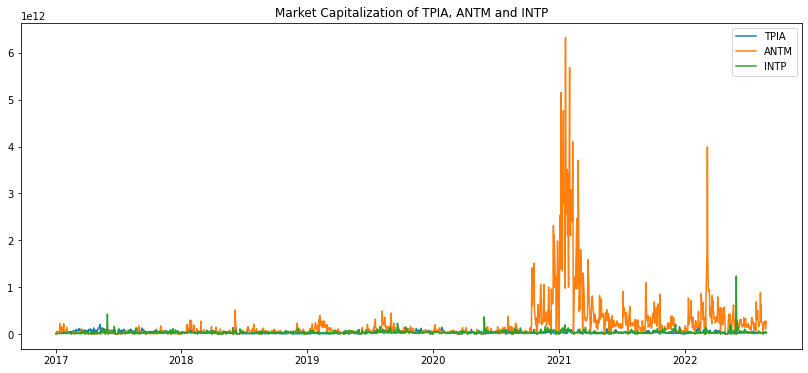

In [13]:
#calculating market capitalization
chandradf['marketcap'] = chandradf['close']*chandradf['volume']
antamdf['marketcap'] = antamdf['close']*antamdf['volume']
indocementdf['marketcap'] = indocementdf['close']*indocementdf['volume']

#plot the market capitalization of these stocks for the latest 5 years
plt.figure(figsize=(14, 6))
plt.plot(chandradf['date'], chandradf['marketcap'], label='TPIA')
plt.plot(antamdf['date'], antamdf['marketcap'], label='ANTM')
plt.plot(indocementdf['date'], indocementdf['marketcap'], label='INTP')
plt.title('Market Capitalization of TPIA, ANTM and INTP')
plt.legend()
plt.savefig('stockmarketcapcompare.png')
plt.show()

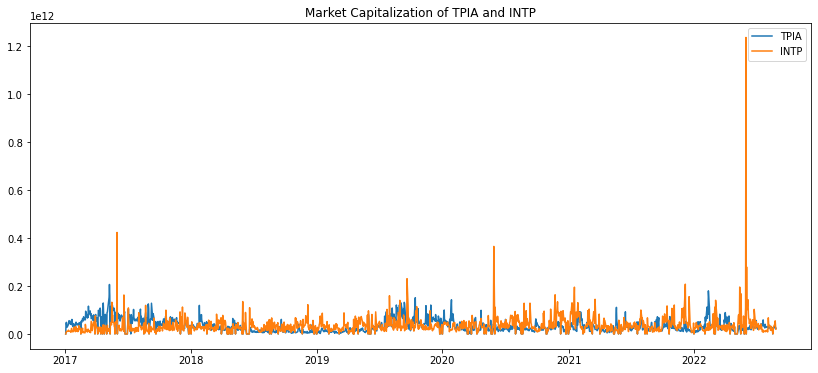

In [14]:
#plot the market capitalization of these stocks for the latest 5 years
plt.figure(figsize=(14, 6))
plt.plot(chandradf['date'], chandradf['marketcap'], label='TPIA')
plt.plot(indocementdf['date'], indocementdf['marketcap'], label='INTP')
plt.title('Market Capitalization of TPIA and INTP')
plt.legend()
plt.savefig('tpiaintpmarketcapcompare.png')
plt.show()

Short Recap:
* Based on the current price, INTP and TPIA have almost similar value while ANTM is much lower. On overall, ANTM has always lower price than others
* But based on the volume traded, ANTM is much superior than others.

This volume of stock traded and price are included in the calculation of market capitalization. The superior amount of ANTM stocks traded leads to its much higher figure than others in terms of market cap. 

This one should be included in the point of consideration before investment. The company with large market capitalization considered much safer to invest as it represents their longer history of business and more established financial performance.

Well in terms of market cap, we may infer that ANTM is better and safer choice than others. But let's not stop in this point, we should take a look in shorter duration (for example in 2022) when their market caps are not much different between each other. With this step, we also can see their current financial performance.

### 3.5. Comparative Analysis of The Stock Price Volatility

**Volatility is a statistical measure of the dispersion of returns for a given security or market index.** In most cases, the higher the volatility, the riskier the security. Volatility is often measured from either the standard deviation or variance between returns from that same security or market index.

In the securities markets, volatility is often associated with big swings in either direction. For example, when the stock market rises and falls more than one percent over a sustained period of time, it is called a "volatile" market. An asset's volatility is a key factor when pricing options contracts.

Here, we will calculate the percentage increase in stock value. **A percentage increase in stock value is the change in stock comparing that to the previous day. The bigger the value either positive or negative the volatile the stock is.**

In [1]:
#calculating returns day by day
chandradf['returns'] = (chandradf['close']/chandradf['close'].shift(1)) -1
antamdf['returns'] = (antamdf['close']/antamdf['close'].shift(1)) -1
indocementdf['returns'] = (indocementdf['close']/indocementdf['close'].shift(1)) -1

#plot the volatility of these stocks for the latest 5 years
plt.figure(figsize=(14, 6))
plt.hist(chandradf['returns'], bins = 100, label = 'TPIA')
plt.hist(antamdf['returns'], bins = 100, label = 'ANTM')
plt.hist(indocementdf['returns'], bins = 100, label = 'INTP')
plt.xlim(-0.2, 0.2)
plt.title('Volatility of TPIA, ANTM and INTP')
plt.xlabel('The Return Variation Percentage')
plt.legend()
plt.savefig('stockvolatilitycompare.png')
plt.show()

NameError: name 'chandradf' is not defined

Based on the graph above, We can see that TPIA has the least volatile stock value than others. Although the difference between there three is not quite significant. We can see from the width of the histogram. The wider, the more volatile the stock value is.

So, we may infer that TPIA is slights safer option to invest

### 3.6. Moving Average of Each Stock

In finance, a moving average (MA) is a stock indicator commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time frame are mitigated.

Investors may choose different periods of varying lengths to calculate moving averages based on their trading objectives. Shorter moving averages are typically used for short-term trading, while longer-term moving averages are more suited for long-term investors.

While it is impossible to predict the future movement of a specific stock, using technical analysis and research can help make better predictions. **A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates that it is in a downtrend.**

### 3.6.1. Moving Average of TPIA stock

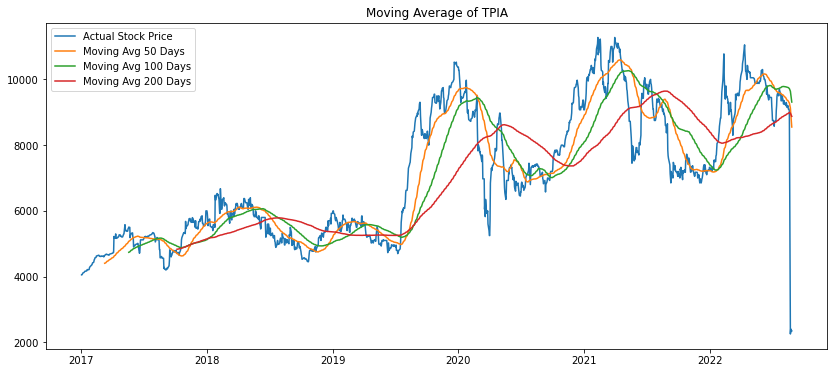

In [16]:
chandradf['mean50'] = chandradf['close'].rolling(50).mean()
chandradf['mean100'] = chandradf['close'].rolling(100).mean()
chandradf['mean200'] = chandradf['close'].rolling(200).mean()

#plot the market capitalization of these stocks for the latest 5 years
plt.figure(figsize=(14, 6))
plt.plot(chandradf['date'], chandradf['close'], label='Actual Stock Price')
plt.plot(chandradf['date'], chandradf['mean50'], label='Moving Avg 50 Days')
plt.plot(chandradf['date'], chandradf['mean100'], label='Moving Avg 100 Days')
plt.plot(chandradf['date'], chandradf['mean200'], label='Moving Avg 200 Days')
plt.title('Moving Average of TPIA')
plt.legend()
plt.savefig('trendtpia.png')
plt.show()

### 3.6.2. Moving Average of ANTM stock

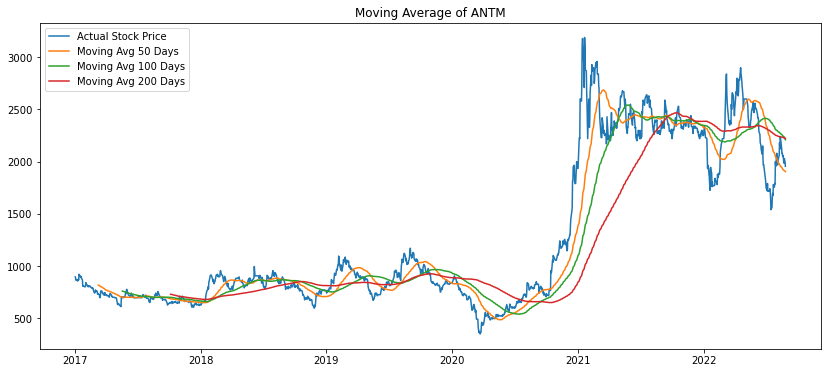

In [17]:
antamdf['mean50'] = antamdf['close'].rolling(50).mean()
antamdf['mean100'] = antamdf['close'].rolling(100).mean()
antamdf['mean200'] = antamdf['close'].rolling(200).mean()

#plot the market capitalization of these stocks for the latest 5 years
plt.figure(figsize=(14, 6))
plt.plot(antamdf['date'], antamdf['close'], label='Actual Stock Price')
plt.plot(antamdf['date'], antamdf['mean50'], label='Moving Avg 50 Days')
plt.plot(antamdf['date'], antamdf['mean100'], label='Moving Avg 100 Days')
plt.plot(antamdf['date'], antamdf['mean200'], label='Moving Avg 200 Days')
plt.title('Moving Average of ANTM')
plt.legend()
plt.savefig('trendantm.png')
plt.show()

### 3.6.3. Moving Average of INTP stock

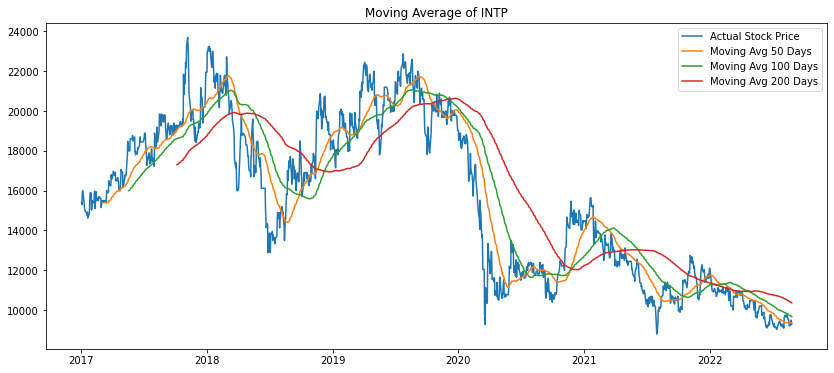

In [18]:
indocementdf['mean50'] = indocementdf['close'].rolling(50).mean()
indocementdf['mean100'] = indocementdf['close'].rolling(100).mean()
indocementdf['mean200'] = indocementdf['close'].rolling(200).mean()

#plot the market capitalization of these stocks for the latest 5 years
plt.figure(figsize=(14, 6))
plt.plot(indocementdf['date'], indocementdf['close'], label='Actual Stock Price')
plt.plot(indocementdf['date'], indocementdf['mean50'], label='Moving Avg 50 Days')
plt.plot(indocementdf['date'], indocementdf['mean100'], label='Moving Avg 100 Days')
plt.plot(indocementdf['date'], indocementdf['mean200'], label='Moving Avg 200 Days')
plt.title('Moving Average of INTP')
plt.legend()
plt.savefig('trendintp.png')
plt.show()

Based on the moving average, TPIA and ANTM are in an uptrend, while INTP is in a downtrend.

### 3.7. Seasonality in The Latest 5 Years

Seasonality refers to predictable changes that occur over a one-year period in a business or economy based on the seasons including calendar or commercial seasons. Seasonality can be used to help analyze stocks and economic trends.

### 3.7.1. Seasonality of TPIA Stock 

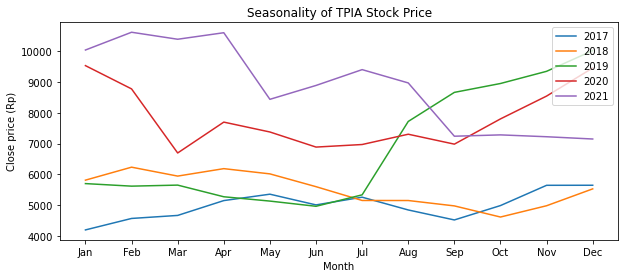

In [19]:
#create pivot table
season = chandradf.pivot_table(index = 'month', columns = 'year', values = 'close', aggfunc = 'mean')
season.columns = ['year2017', 'year2018', 'year2019', 'year2020', 'year2021', 'year2022']
season.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#plot the market capitalization of these stocks for the latest 5 years
plt.figure(figsize=(10, 4))
plt.plot(season.index, season['year2017'], label='2017')
plt.plot(season.index, season['year2018'], label='2018')
plt.plot(season.index, season['year2019'], label='2019')
plt.plot(season.index, season['year2020'], label='2020')
plt.plot(season.index, season['year2021'], label='2021')
plt.title('Seasonality of TPIA Stock Price')
plt.xlabel('Month')
plt.ylabel('Close price (Rp)')
plt.legend(loc='upper right')
plt.savefig('monthseasonaltpia.png')
plt.show()

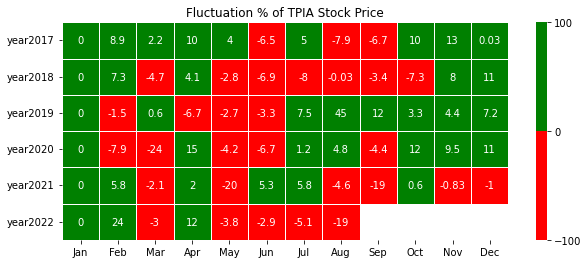

In [20]:
import matplotlib.colors as mcolors

#transpose current dataframe
monthseason = season.copy().T
cols = monthseason.columns
monthseason.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#calculate the fluctuation percentage every month based on its previous month
for i in range(1, len(monthseason.columns)+1):
    if i == 1:
        monthseason[f'm{i}'] = 0
    else:
        monthseason[f'm{i}'] = round((monthseason[i]-monthseason[i-1])*100/monthseason[i-1], 2)
        
#drop unused column 
monthseason = monthseason.drop(columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
monthseason.columns = cols

#visualize the fluctuation percentage with heatmap
#negative will be shown red, while positive will be shown green
cmap, norm = mcolors.from_levels_and_colors([-100,0,100], ['red', 'green'])
plt.figure(figsize=(10, 4))
sns.heatmap(monthseason, linewidth = 1 , annot = True, cmap=cmap, norm=norm)
plt.title('Fluctuation % of TPIA Stock Price')
plt.savefig('monthseasonaltpia2.png')

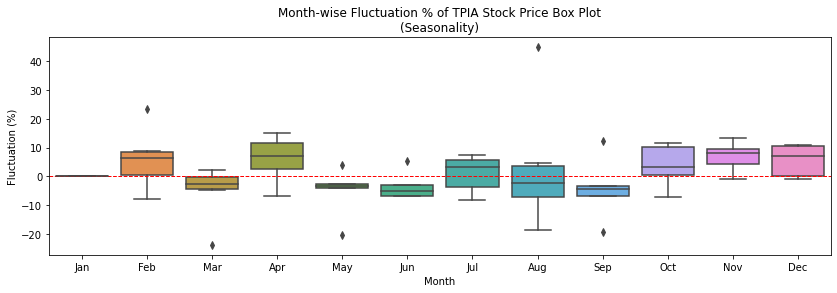

In [21]:
#prepare the dataset
monthseasonmelt = pd.melt(monthseason.reset_index(), id_vars=['index'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#visualize box plot
plt.figure(figsize=(14, 4))
sns.boxplot(data = monthseasonmelt, x='variable', y='value')
plt.title('Month-wise Fluctuation % of TPIA Stock Price Box Plot\n(Seasonality)')
plt.xlabel('Month')
plt.ylabel('Fluctuation (%)')
plt.axhline(y=0, color='red', linewidth=1, linestyle='dashed')
plt.savefig('monthseasonaltpia3.png')

### 3.7.2. Seasonality of ANTM Stock 

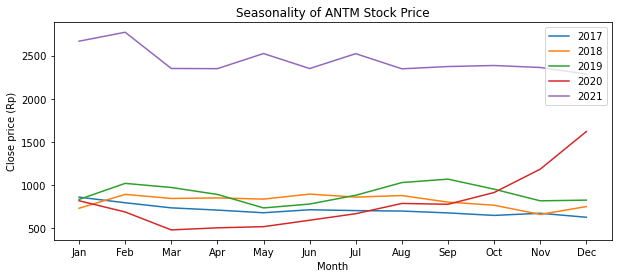

In [22]:
#create pivot table
season = antamdf.pivot_table(index = 'month', columns = 'year', values = 'close', aggfunc = 'mean')
season.columns = ['year2017', 'year2018', 'year2019', 'year2020', 'year2021', 'year2022']
season.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#plot the market capitalization of these stocks for the latest 5 years
plt.figure(figsize=(10, 4))
plt.plot(season.index, season['year2017'], label='2017')
plt.plot(season.index, season['year2018'], label='2018')
plt.plot(season.index, season['year2019'], label='2019')
plt.plot(season.index, season['year2020'], label='2020')
plt.plot(season.index, season['year2021'], label='2021')
plt.title('Seasonality of ANTM Stock Price')
plt.xlabel('Month')
plt.ylabel('Close price (Rp)')
plt.legend(loc='upper right')
plt.savefig('monthseasonalantm.png')
plt.show()

As shown from the graph above, we hardly see any seasonalities. There is no particular characteristics in each month. Let's try to see it further by heatmap.

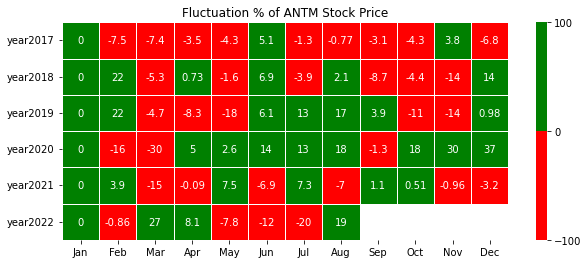

In [23]:
import matplotlib.colors as mcolors

#transpose current dataframe
monthseason = season.copy().T
cols = monthseason.columns
monthseason.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#calculate the fluctuation percentage every month based on its previous month
for i in range(1, len(monthseason.columns)+1):
    if i == 1:
        monthseason[f'm{i}'] = 0
    else:
        monthseason[f'm{i}'] = round((monthseason[i]-monthseason[i-1])*100/monthseason[i-1], 2)
        
#drop unused column 
monthseason = monthseason.drop(columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
monthseason.columns = cols

#visualize the fluctuation percentage with heatmap
#negative will be shown red, while positive will be shown green
cmap, norm = mcolors.from_levels_and_colors([-100,0,100], ['red', 'green'])
plt.figure(figsize=(10, 4))
sns.heatmap(monthseason, linewidth = 1 , annot = True, cmap=cmap, norm=norm)
plt.title('Fluctuation % of ANTM Stock Price')
plt.savefig('monthseasonalantm2.png')

As we can see the grap above, We still hardly see the seasonality. But there are something that we can infer here:
* The `ANTM` stock almost always suffers a downtrend in March. The latest 3 years (2020-2022) showed high risk high return situation, move within a huge drop (2020-2021) or a huge leap (2022).
* In June, the stock usually has an uptrend, but 2021-2022.
* 2020 may be the best year for `ANTM` lately.

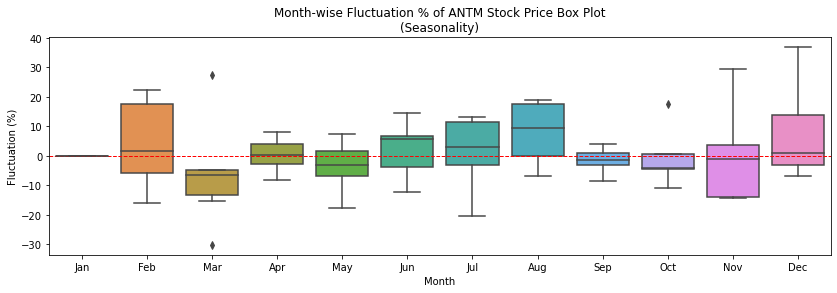

In [24]:
#prepare the dataset
monthseasonmelt = pd.melt(monthseason.reset_index(), id_vars=['index'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#visualize box plot
plt.figure(figsize=(14, 4))
sns.boxplot(data = monthseasonmelt, x='variable', y='value')
plt.title('Month-wise Fluctuation % of ANTM Stock Price Box Plot\n(Seasonality)')
plt.xlabel('Month')
plt.ylabel('Fluctuation (%)')
plt.axhline(y=0, color='red', linewidth=1, linestyle='dashed')
plt.savefig('monthseasonalantm3.png')

The larger the boxplot, the higher the volatility. The higher volatility, the riskier the investment we put at that time. Volatility shows the swings in each direction. 

In February, the stock casually has an uptrend, but then drop in March. The stock moves upward gradually until August. Then suffers a significant drop, before recovers towards the end of the year. 

From the seasonality, we may infer that:
* Good time to buy is in December when the price starts to rise significantly after suffering slight drop in the previous months. 
* In February, it has been seen that the price rather volatile so we have to be aware of the market. It may be time to sell the share before March.
* We may buy shares in May, in the start of an uptrend in middle of the year. Then release it in August.

### 3.7.3. Seasonality of INTP Stock 

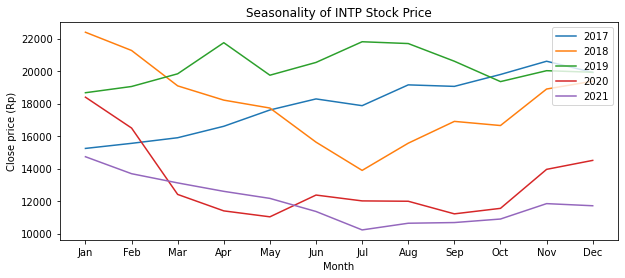

In [25]:
#create new column month and year
indocement['year'] = pd.DatetimeIndex(indocement['date']).year
indocement['month'] = pd.DatetimeIndex(indocement['date']).month

#only include the latest 5 years
season = indocement[indocement['year']>=2017]

#create pivot table
season = season.pivot_table(index = 'month', columns = 'year', values = 'close', aggfunc = 'mean')
season.columns = ['year2017', 'year2018', 'year2019', 'year2020', 'year2021', 'year2022']
season.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#plot the market capitalization of these stocks for the latest 5 years
plt.figure(figsize=(10, 4))
plt.plot(season.index, season['year2017'], label='2017')
plt.plot(season.index, season['year2018'], label='2018')
plt.plot(season.index, season['year2019'], label='2019')
plt.plot(season.index, season['year2020'], label='2020')
plt.plot(season.index, season['year2021'], label='2021')
plt.title('Seasonality of INTP Stock Price')
plt.xlabel('Month')
plt.ylabel('Close price (Rp)')
plt.legend(loc='upper right')
plt.savefig('monthseasonalintp.png')
plt.show()

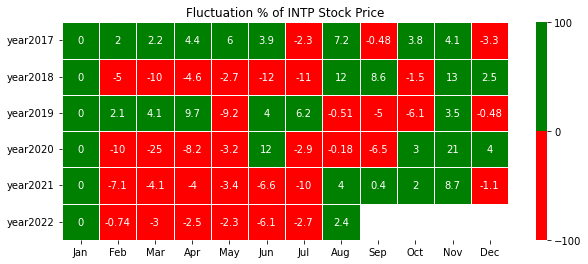

In [26]:
import matplotlib.colors as mcolors

#transpose current dataframe
monthseason = season.copy().T
cols = monthseason.columns
monthseason.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#calculate the fluctuation percentage every month based on its previous month
for i in range(1, len(monthseason.columns)+1):
    if i == 1:
        monthseason[f'm{i}'] = 0
    else:
        monthseason[f'm{i}'] = round((monthseason[i]-monthseason[i-1])*100/monthseason[i-1], 2)
        
#drop unused column 
monthseason = monthseason.drop(columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
monthseason.columns = cols

#visualize the fluctuation percentage with heatmap
#negative will be shown red, while positive will be shown green
cmap, norm = mcolors.from_levels_and_colors([-100,0,100], ['red', 'green'])
plt.figure(figsize=(10, 4))
sns.heatmap(monthseason, linewidth = 1 , annot = True, cmap=cmap, norm=norm)
plt.title('Fluctuation % of INTP Stock Price')
plt.savefig('monthseasonalintp2.png')

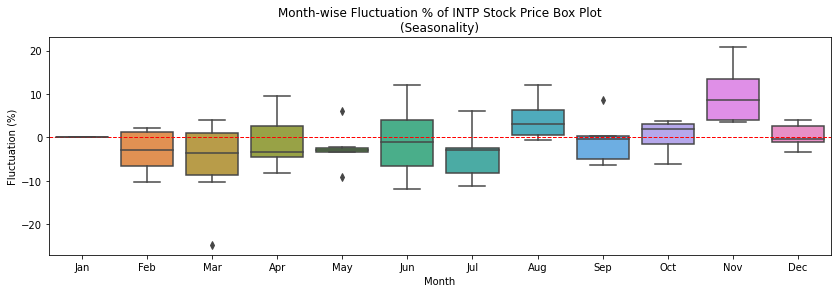

In [27]:
#prepare the dataset
monthseasonmelt = pd.melt(monthseason.reset_index(), id_vars=['index'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#visualize box plot
plt.figure(figsize=(14, 4))
sns.boxplot(data = monthseasonmelt, x='variable', y='value')
plt.title('Month-wise Fluctuation % of INTP Stock Price Box Plot\n(Seasonality)')
plt.xlabel('Month')
plt.ylabel('Fluctuation (%)')
plt.axhline(y=0, color='red', linewidth=1, linestyle='dashed')
plt.savefig('monthseasonalintp3.png')

## 4. Data Preprocessing

### 4.1. Feature Selection

Since we want to predict the stock price movement, we will only use `close` column. 

In [5]:
#Filter out the closing market price data and convert the data into array for easy evaluation
df = antamdf.filter(['close']).reset_index(drop=True).values
df

array([[ 895],
       [ 885],
       [ 865],
       ...,
       [2010],
       [1995],
       [1955]], dtype=int64)

### 4.2. Splitting Data into Training Dataset and Testing Dataset 

80% training dataset and 20% testing dataset

In [6]:
import math
from sklearn.preprocessing import MinMaxScaler

#Creating training data size : 80% of the data
df_train_len = math.ceil(len(df) *.8)
df_train = df[0:df_train_len, : ]

### 4.3. Feature Scaling

#### Normalization

In [7]:
#Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df_train_scaled = scaler.fit_transform(df_train)

In [8]:
#Separating the data into x and y data
feature_df_train = []
target_df_train =[]
for i in range(60,len(df_train_scaled)):
    feature_df_train = list(feature_df_train)
    target_df_train = list(target_df_train)
    feature_df_train.append(df_train_scaled[i-60:i,0])
    target_df_train.append(df_train_scaled[i,0])
 
    #Converting the training x and y values to numpy arrays
    feature_df_train1, target_df_train1 = np.array(feature_df_train), np.array(target_df_train)
 
    #Reshaping training x and y data to make the calculations easier
    feature_df_train2 = np.reshape(feature_df_train1, (feature_df_train1.shape[0],feature_df_train1.shape[1],1))

## 5. Modelling

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils.vis_utils import plot_model
import pydot

#building model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(feature_df_train2.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
print(model.summary())
          
#modelling
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(feature_df_train2, target_df_train1, batch_size=1, epochs=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 25)                1275      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None
1120/1120 [==============================] - 43s 33ms/step - loss: 0.0034


## 6. Evaluation

### 6.1. Model Evaluation on Training Dataset

In [10]:
# prepare prediction result on train data
target_predict_train = model.predict(feature_df_train2)
#target_predict_train = scaler.inverse_transform(target_predict_train)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(target_df_train1, target_predict_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(target_df_train1, target_predict_train))))
print('Normalized RMSE for traning data is {}'.format(np.sqrt(mean_squared_error(target_df_train1, target_predict_train))/(max(target_df_train1)-min(target_df_train1))))

35/35 [==============================] - 3s 27ms/step
R-squared for training data is 0.981988574442001
RMSE for training data is 0.027772294481879324
Normalized RMSE for traning data is 0.027772294481879328


The model has succesfully predict 98.19% rows of stock price data, which is very good!

The measured RMSE for training data prediction is 0.03 (considering the value has been scaled), a low value which shows the model can fit the training dataset well.

### 6.2. Model Evaluation on Testing Dataset

In [11]:
#Creating training data size : 30% of the data
df_test = df[df_train_len-60: , : ]

#Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df_test_scaled = scaler.fit_transform(df_test)

#Separating the test data into x and y data
feature_df_test = []
target_df_test = df[df_train_len: , : ]
for i in range(60, len(df_test_scaled)):
    feature_df_test = list(feature_df_test)
    feature_df_test.append(df_test_scaled[i-60:i,0])
    
    #Converting the testing x and y values to numpy arrays
    feature_df_test1 = np.array(feature_df_test)
    feature_df_test2 = np.reshape(feature_df_test1, (feature_df_test1.shape[0], feature_df_test1.shape[1], 1))

In [13]:
# prepare prediction result on test data
target_predict_test = model.predict(feature_df_test2)
target_predict_test = scaler.inverse_transform(target_predict_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for testing data is {}'.format(r2_score(target_df_test, target_predict_test)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_df_test, target_predict_test))))
print('Normalized RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_df_test, target_predict_test))/(max(target_df_test)-min(target_df_test))))

10/10 [==============================] - 0s 25ms/step
R-squared for testing data is 0.8386937000424876
RMSE for testing data is 113.49161714321366
Normalized RMSE for testing data is [0.08344972]


The model has succesfully predicted 83.86% rows of stock price testing dataset, which is very good!

The error measured from the model is 113.49. Given the number here has been retransformed to its actual scale (i.e. between 500 to 3000), this error is relatively small. We can say that the model can forecast the stock price movement very well

**Conclusion : Just Fit!**

### 6.3. Model Visualization

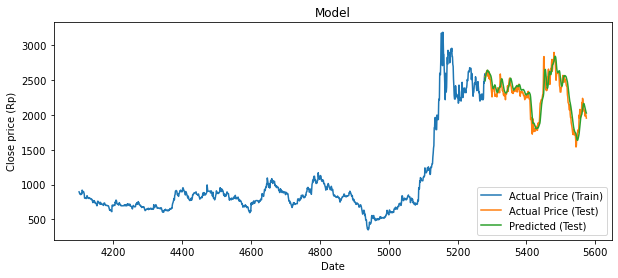

In [14]:
train = antamdf[:df_train_len]
test = antamdf[df_train_len:]

test['Predictions'] = target_predict_test

#plot the stock price of ANTM stocks for the latest 5 years
plt.figure(figsize=(10, 4)) 
plt.plot(train['close'])
plt.plot(test[['close', 'Predictions']])
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close price (Rp)')
plt.legend(['Actual Price (Train)', 'Actual Price (Test)', 'Predicted (Test)'], loc='lower right')
plt.savefig('forecastingresult.png')
plt.show()

We can see that our model can follow the trend of stock price movement very well. Either uptrend or downtrend has been succesfully predicted. Let's take a look at the graph below!

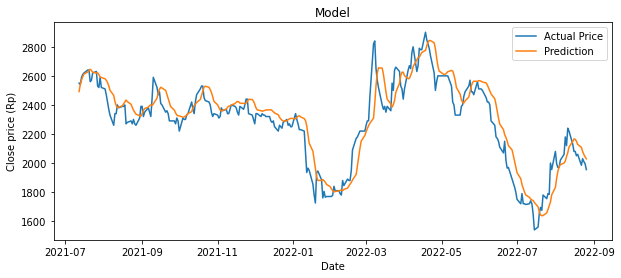

In [15]:
#plot the actual and predicted price in testing dataset 
plt.figure(figsize=(10, 4))
plt.plot(test['date'], test['close'], label='Actual Price')
plt.plot(test['date'], test['Predictions'], label='Prediction')
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close price (Rp)')
plt.legend(loc='upper right')
plt.savefig('forecastingresult2.png')
plt.show()

We should restate here that the price value of the stock is not the most important for our stock price forecasting project. The investor is not benefitted the most from the price, but from its fluctuation through the time. Hence, the model should follow the actual trend accurately to be able to be utilized the most for our benefit. 

We can see that the model can predict the significant uptrend and downtrend smoothly. 

## 7. Result

Now we try to use this model to help us deciding when to buy and sell to maximize our investment return. Based on the model plot of ANTM price below, we decide to buy on February 15th, 2022 and sell it on May 3rd, 2022.

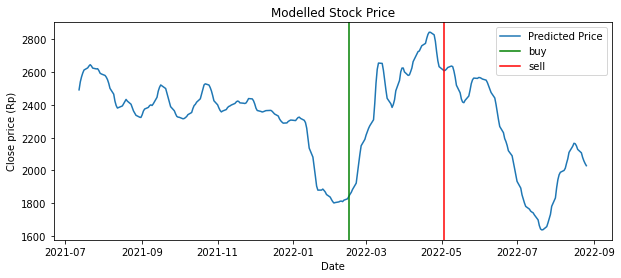

In [16]:
from datetime import datetime

#decide the start date and end date of investment based on the modelled stock price
start = datetime.date(datetime.strptime('2022-02-15', '%Y-%m-%d')) 
end = datetime.date(datetime.strptime('2022-05-03', '%Y-%m-%d'))
#invest = test.loc[(test['date']>=start) & (test['date']<end)]

#plot the actual and predicted price in testing dataset 
plt.figure(figsize=(10, 4))
plt.plot(test['date'], test['Predictions'], label='Predicted Price')
plt.title('Modelled Stock Price')
plt.xlabel('Date')
plt.ylabel('Close price (Rp)')
plt.axvline(x=start, color='green', label='buy')
plt.axvline(x=end, color='red', label='sell')
plt.legend(loc='upper right')
plt.savefig('investment.png')
plt.show()

In [18]:
test[['close', 'Predictions']]

,close,Predictions
5280,2550,2491.875732
5281,2540,2540.305664
5282,2590,2571.072510
5283,2610,2594.687256
5284,2620,2612.763428
...,...,...
5570,1985,2107.813721
5571,2030,2079.798096
5572,2010,2059.031006
5573,1995,2042.591064


Now, we will calculate the predicted return on investment, simply dividing the profit earned by the cost (buy price). Then compare it to the actual value of return on investment.

In [17]:
#calculate the predicted return of investment
buy = int(test['Predictions'][test['date']==start])
sell = int(test['Predictions'][test['date']==end])
print('The Predicted Return on Investment :', (sell-buy)*100/buy, '%')

buy = int(test['close'][test['date']==start])
sell = int(test['close'][test['date']==end])
print('The Actual Return on Investment :', (sell-buy)*100/buy, '%')

The Predicted Return on Investment : 41.662140141227596 %
The Actual Return on Investment : 38.297872340425535 %


Through the time our model predicted, our strategy elected to make investment on February 15th, 2022 and sell it on May 3rd, 2022. This strategy makes two bold assumptions:
1. We were able to purchase a share at the exact price recorded as the actual historic closing price
2. We were able to sell that share just before closing at the exact price recorded as the actual historic closing price

Applying this strategy and these assumptions, our model generated ~38.29% increase of total capital. If our starting capital was Rp10,000,000.00, the investment would have returned by Rp3,829,000.00.

## 8. Conclusion and Recommendation

First, we have to look back to our objectives in this project. The first objective is selecting the best stock available in the market for our investment. Due to large number of options we have, the blue chip stock is choosed as it is much more safer and more friendly for the beginner investor. Below is our selected options:
1. TPIA (PT Chandra Asri Petrochemical Tbk)
2. ANTM (PT Aneka Tambang Tbk)
3. INTP (PT Indocement Tunggal Prakarsa Tbk)

There are several factors that is included in our consideration to select the best stock. We conduct comparative analysis towards these three stocks and conclude that:
* Based on the volume traded for the latest 5 years, ANTM has the more superior performance than others. Means ANTM is the most liquid. This can guarantee the existing and upcoming trading activities for investors.  
* Based on the market capitalization, ANTM is also the best.
* Based on the volatility, which means the swings around the stock price, TPIA is seen as the least volatile though it is not in a significant manner.
* As we explore the trends for each stock, only INTP that has been suffering a downtrend overall. While ANTM and INTP have better performance, achieving an uptrend through the 5 year period overall.

So, after several consideration, we see that ANTM has the best performance overall. Hence, for the following step (i.e. forecasting), we will try to forecast its stock price's seasonality and fluctuation to guide us which will be the best time to invest our money on it. 

In our forecasting project, we use LSTM algorithm due to its superiority on time series modelling than other algorithm as shown in several references. The modelling results in:
* The model could predict 82.99% of stock price value available in the testing dataset, which is a very good performance!
* The predicted price only deviates around its actual value for 116.53 rupiahs on average. Considering the stock price pf ANTM is around 1000-2000, so its price fraction for trading is 100 based on Indonesia Stock Exchange. Then compared to the error we get (100 - 112), this error is considerably small and tolerable.
* Our model has succesfully follow the stock price trend, which is more important than reaching the actual value of its price. as be seen from the visualization.
* Our model could generate ~38.29% increase of total investment capital


### Reference

* https://www.askpython.com/python/examples/stock-price-prediction-python?utm_source=pocket_mylist
* https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/?utm_source=pocket_mylist
* https://www.analyticsvidhya.com/blog/2021/07/stock-prices-analysis-with-python/?utm_source=pocket_mylist
* https://keras.io/api/layers/recurrent_layers/lstm/
* https://www.analyticsvidhya.com/blog/2018/11/neural-networks-hyperparameter-tuning-regularization-deeplearning/
* https://keras.io/api/metrics/regression_metrics/#rootmeansquarederror-class
* https://www.kaggle.com/code/kamyarazar/stock-price-prediction-lstm-hyperparameter-tuning
* https://github.com/paudelprabesh/Hyperparameter-Tuning-In-LSTM-Network/blob/main/notebooks/grid-search/grid_search-final.ipynb
* https://www.datacamp.com/tutorial/lstm-python-stock-market?utm_source=pocket_mylist
